# Image Processing 03

```
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, sobel, gaussian
from skimage import exposure
from skimage.transform import rotate, resize, rescale
from skimage import morphology
from skimage.restoration import inpaint
```

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate, resize, rescale
from IPython import display
from skimage import morphology
from skimage.restoration import inpaint

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, original_title, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

## Transformations
* Sometimes we may need to transform images by rotating or resizing them.
* For example, if we need to pass images to a Machine Learning model, so it can classify it the image is of a cat or a dog, and we need the image to be upright

#### Why transform images?
* Preparing images for classification in Machine Learning models
* Optimization and compression of images
* Save images with same proportion before processing

### Rotating
* We have previously flipped images using `NumPy`.
* **Rotating images** allows us to apply angles: 
    * When you rotate an image **90 degrees clockwise** (to the **right**)
    * When you rotate an image **90 degrees counter-clockwise** (to the **left**)
    * When you rotate an image **180 degrees clockwise or counter-clockwise** (**upside-down**)
* We can use the `rotate` function from the scikit-image module `transform` to rotate an image by a ceratin angle around it's center.
    * The first parameter is the image we want to rotate and the second parameter is the angle.
    * **The rotation angle is in degrees in counter-clockwise direction.**
        * If we want to rotate clockwise (to the right), we need to specify **negative numbers** as angle degrees.
        * If we want to rotete counter-clockwise (to the left), we need to specify **positive numbers** as angle degerees.

In [ ]:
from skimage.transform import rotate

```
# Rotate the image 90 degrees clockwise
image_rotated = rotate(image, -90)

show_image(image, 'Original')
show_image(image_rotated, 'Rotated 90 degrees clockwise')
```

### Rescaling
* The `rescale` operation resizes an image by a given scaling factor.
    * This can either be a ingle floating point value, or multiple values (one for each axis)
    * We can use the `rescale` function from the `transform` module.
    
#### Downgrading

```
from skimage.transform import rescale

# Rescale the image to be 4 times smaller
image_rescaled = rescale(image, 1/4, anti_aliasing=True, multichannel= True)
```
* Setting an **`anti_aliasing`** parameter to `True` specifies if applying a filter to smooth the image prior to down-scaling. 
    * This will be cover further later on.

### Aliasing in digital images
* In a digital image, **aliasing** is a pattern or a rippling effect
* Aliasing makes the image look like it has waves or ripples radiating from a certain portion. **This happens because the pixelation of the image is poor;** the image simply does not look right
* In other words, **aliasing** is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.
* With `anti_aliasing = True`, an image appears softer 
* With `anti_aliasing = False`, an image appears more pixelated

### Resizing
* **Resizing** is used for making images match a certain size (the same purpose as rescale)< but allows to specify an output image shape, rather than a scaling factor
* We can use the `resize` function from the `transform` module
* This function requires the original image as the first parameter

```
from skimage.transform import resize

# Height and width to resize
height = 400
width = 500

# Resize image
image_resized = resize(image, (height, weight), anti_aliasing= True)
```

### Resizing proportionally
* If we want to avoid disproporionate dimensions, we can resize an image proportionally by taking the original by **taking the original height and width size of the image and dividing it by the scaling factor.**

```
from skimage.transform import resize

# Set proportional height so it is one fourth its size, or four times smaller
height = image.shape[0] / 4
width = image.shape[1] / 4

#Resize image
image_resized = resize(image, (height, width), anti_aliasing=True)
```
* Above we obtain a good-looking and proportionally accurate resizing.

```
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")
```

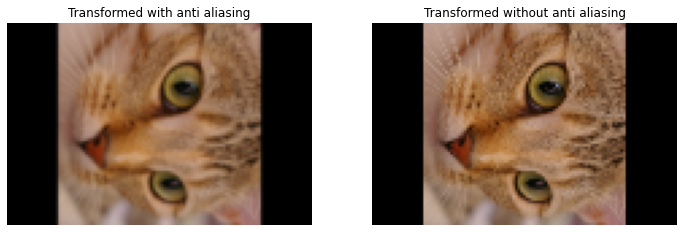

In [4]:
#from skimage.transform import rotate, rescale
image_cat = data.cat()
rotated_cat_image = rotate(image_cat, -90)
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)
plot_comparison(rescaled_with_aa, "Transformed with anti aliasing", rescaled_without_aa, "Transformed without anti aliasing")

#### Enlarging Images
Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

You'll do this by rescaling the image of a rocket, that will be loaded from the data module.

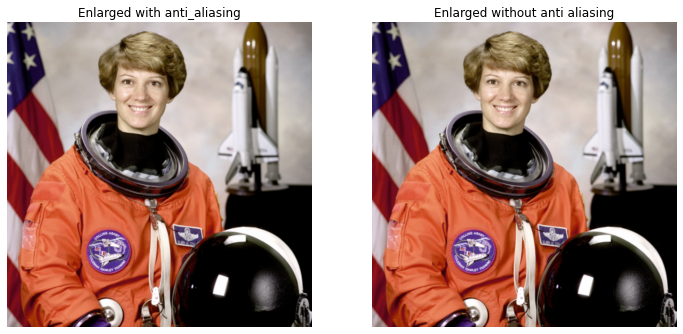

In [5]:
# Import the module and function to enlarge images
#from skimage.transform import rescale

# Import the data module
#from skimage import data

# Load the image from data
astro_image = data.astronaut()

# Enlarge the image so it is 3 times bigger with aa
enlarged_astro_image_aa = rescale(astro_image, 3, anti_aliasing=True, multichannel=True)


# Enlarge the image so it is 3 times bigger without aa
enlarged_astro_image_no_aa = rescale(astro_image, 3, anti_aliasing=False, multichannel=True)

plot_comparison(enlarged_astro_image_aa, 'Enlarged with anti_aliasing', enlarged_astro_image_no_aa, 'Enlarged without anti aliasing')

### Proportionally resizing

We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.

First, you'll try it out for one image so you know what code to test later in the rest of the pictures.

Remember that by looking at the shape of the image, you can know its width and height.

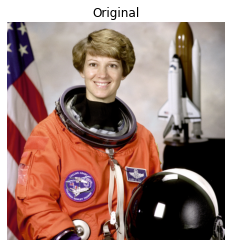

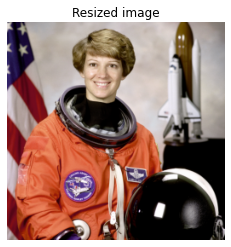

In [6]:
# Import the module and function
#from skimage.transform import resize


# Set proportional height so its half its size
height = int(astro_image.shape[0] / 2)
width = int(astro_image.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(astro_image, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(astro_image, 'Original')
show_image(image_resized, 'Resized image')

## Morphology

### Morphological filtering
* When you try to spot objects in an image, you can do so by its characteristics, like the shape. This is what **morphology** does.
* **Binary regions** produced by **simple thresholding** can be distorted by noise and texture.
* **Morphological filtering operations** try to remove these imperfections by accounting for the form and structure of the objects in the image. 
* Better for binary images 
* Can extend to grayscale

### Morphological operations
* Basic morphological operations are dilation and erosion
    * **Dilatation** adds pixels to the boundaries of objects in an image
    * **Erosion** removes pixels on the boundaries of objects in an image
* The number of pixels added or removed from the objects in an image depends on the size and shape of a structuring element used to process the image. 

### Structuring element 
* The number of pixels added or removed from the objects in an image depends on the size and shape of a structuring element used to process the image. 
* The **structuring element** is a small binary image used to probe the input image
* We try to "fit" in the image object we want to get its shape.

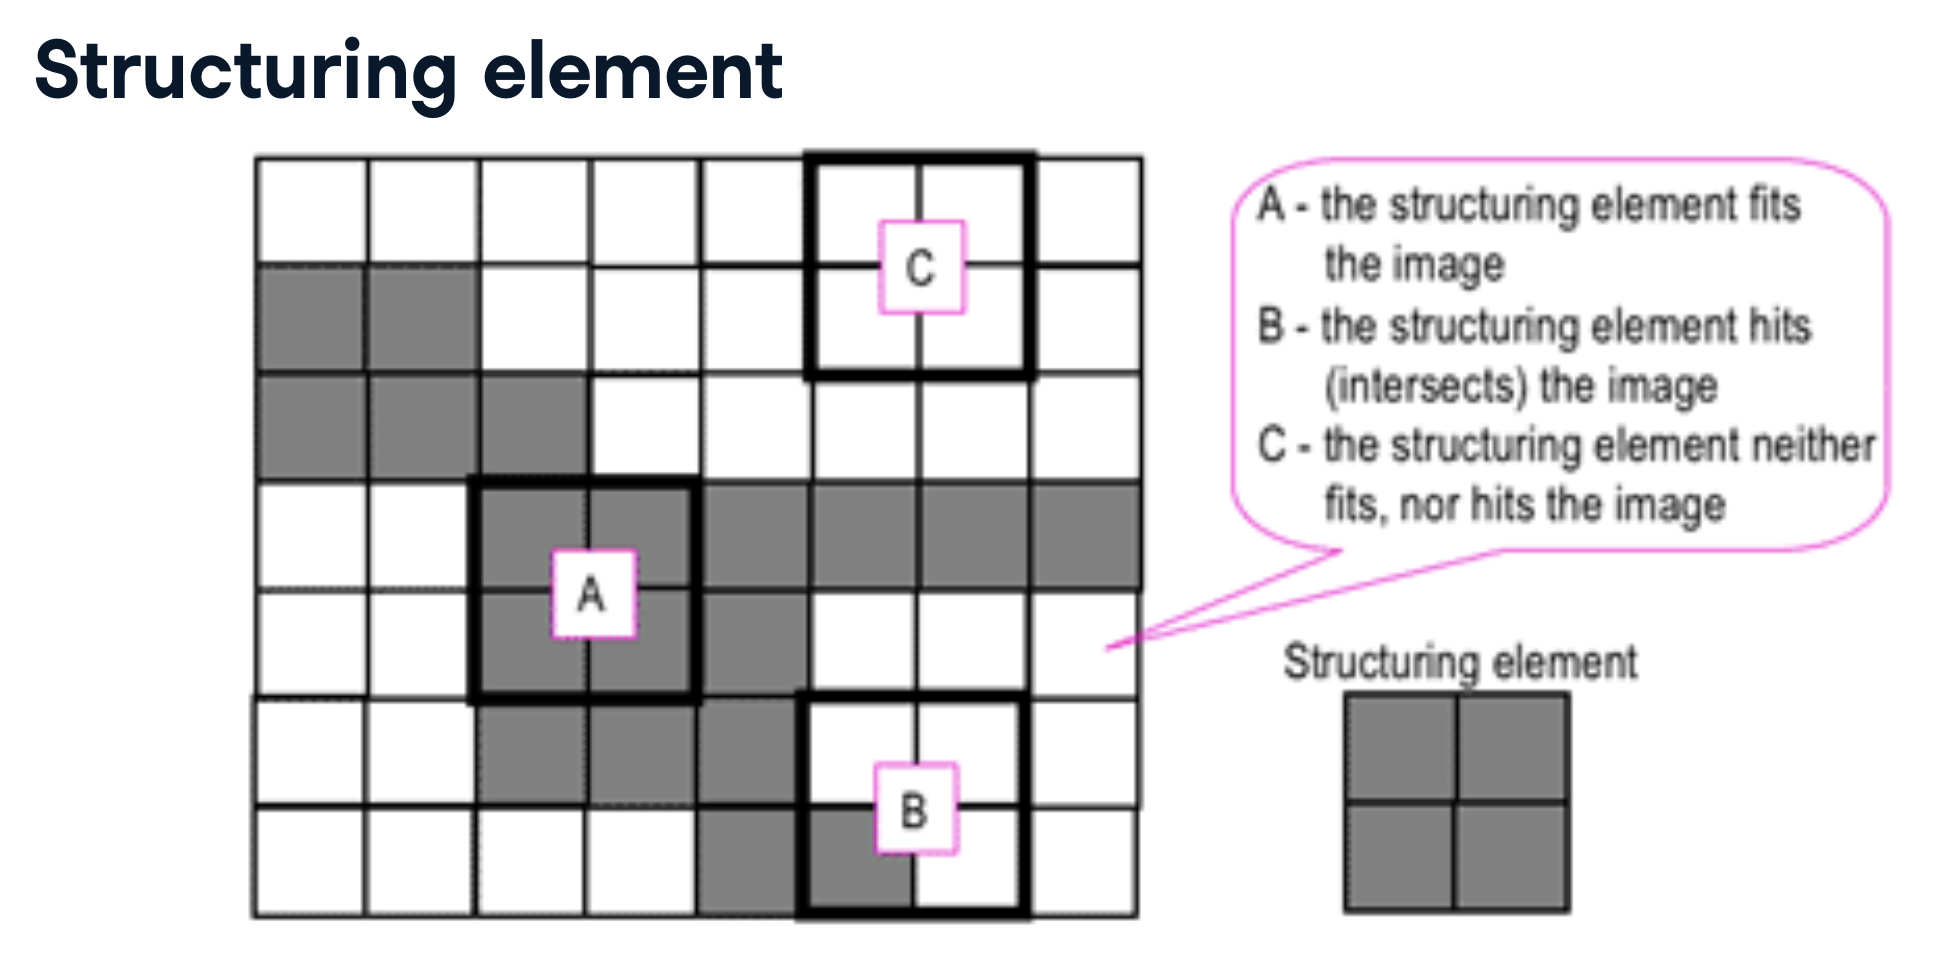

In [50]:
display.Image("pics/structuring_element.png")

* Here (above), the square structuring element named "A" fits the object we want to select.
* The "B" intersects the object
* The "C" is outside of the object.
* So, if we want to select an apple in a table, we want the structuring element fit in that apple so then expands, probe, and obtain the shape (?)

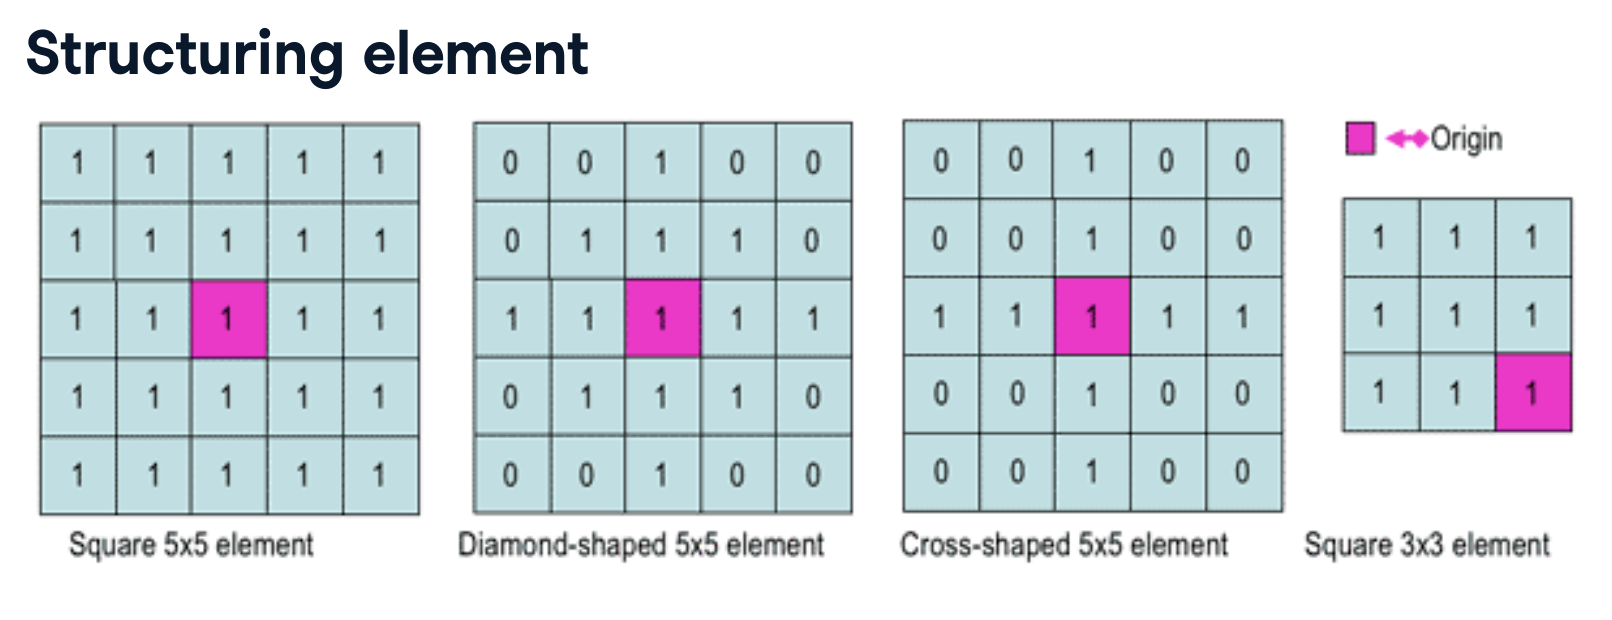

In [51]:
display.Image("pics/structuring_element2.png")

* The dimensions specify the size of the structuring element.
* The pattern of ones and zeros specifies the shape of the structuring element. 
* This should be of a similar form to the shape of the object we want to select
* We see here (above), different types of shapes, from squares, to a diamond, and a cross.
* The pink cell in the center is the origin of the structuring element and identifies the pixel being processed

### Shapes in scikit-image
* `scikit-image` has multiple shapes for this structure element, each one with its own method from the the `morphology` module.
* If we want a **square** as the structuring element, we can obtain it with the `square` method. This will return the desired shapes and if we print them we'll see how these are formed with 1s.

```
from skimage import morphology

square = morphology.square(4)

rectangle = morphology.rectangle(4, 2)
```

In [9]:
square = morphology.square(4)
rectangle = morphology.rectangle(4, 2)

In [10]:
print(square)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [11]:
print(rectangle)

[[1 1]
 [1 1]
 [1 1]
 [1 1]]


### Erosion in scikit-image
* To apply erosion, we can use the `binary_erosion` function
* With this, we can optionally set a structuring element to use in the operation
* Here we import and load a binary horse image
* Set the structuring element to a rectangular shape, since it's somewhat similar to the shape we want to obtain, which is a horse. 
* We obtain the eroded image by using the function as below, passing the image and structuring element as parameters.
* **If not set, the function will use a cross-shaped structured element by default.**


```
from skimage import morphology

# Set structuring element to be rectangular-shaped
selem = rectangle(12, 6)

# Obtain the eroded image with binary erosion
eroded_image = morphology.binary_erosion(image_horse, selem=selem)

# Show result
plot_comparison(image_horse, eroded_image, 'Erosion')
```

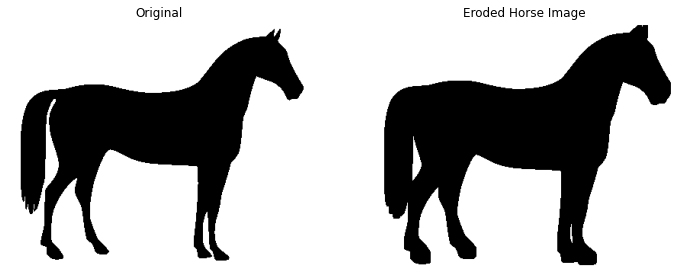

In [13]:
horse_image = data.horse()
selem_horse = morphology.rectangle(12, 6)
eroded_horse_image = morphology.binary_erosion(horse_image, selem=selem_horse)
plot_comparison(horse_image, 'Original', eroded_horse_image, 'Eroded Horse Image')

In [14]:
thresh = 0.5
inverted_horse = horse_image <= thresh

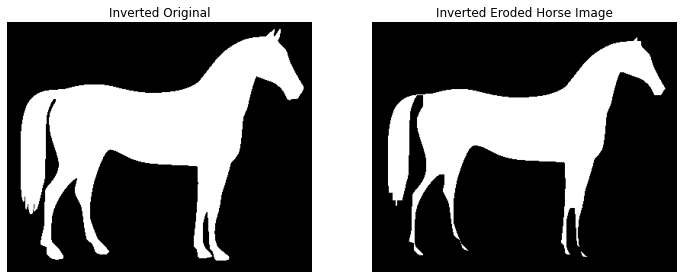

In [25]:
inverted_eroded_horse = morphology.binary_erosion(inverted_horse, selem=selem)
plot_comparison(inverted_horse, 'Inverted Original', inverted_eroded_horse, 'Inverted Eroded Horse Image')

## Adjusting col_size of structuring element: Original horse with erosion

In [33]:
selem_rows = [12]
selem_cols = [12, 10, 8, 6, 4, 2]

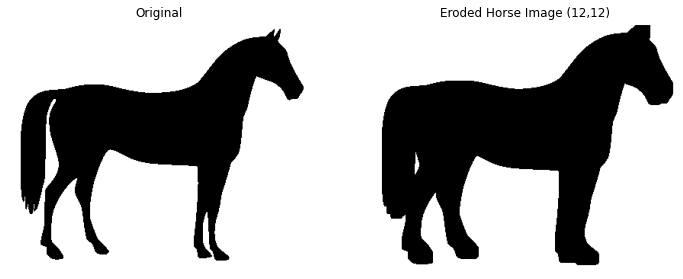

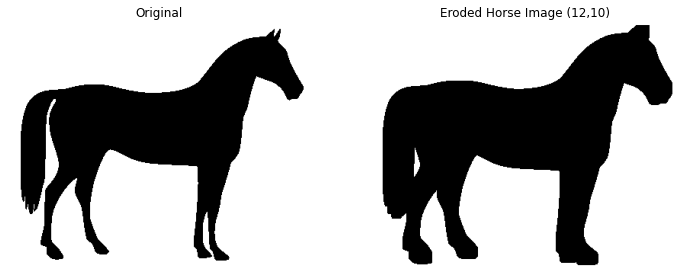

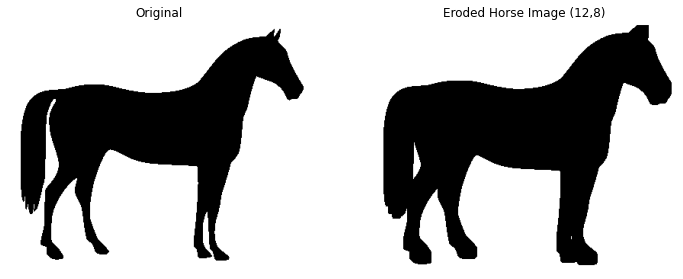

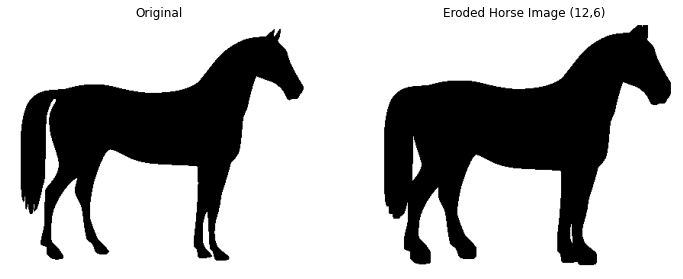

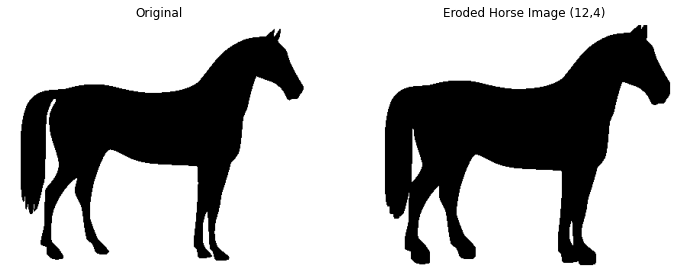

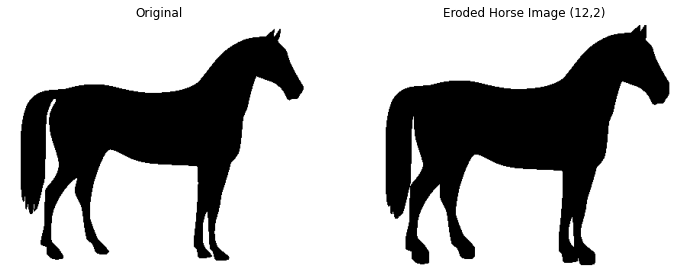

In [34]:
for selem in selem_rows:
    for selem_ in selem_cols:
        eroded_horse_image = morphology.binary_erosion(horse_image, selem=morphology.rectangle(selem, selem_))
        plot_comparison(horse_image, 'Original', eroded_horse_image, 'Eroded Horse Image ('+ str(selem)+','+str(selem_)+')')

## Adjusting row_size of structuring element: Original horse with erosion

In [35]:
selem_rows2 = [12, 10, 8, 6, 4, 2]
selem_cols2 = [12]

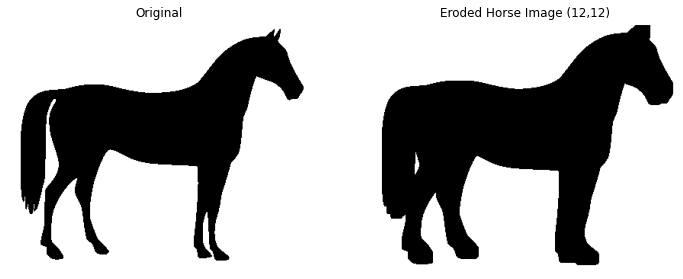

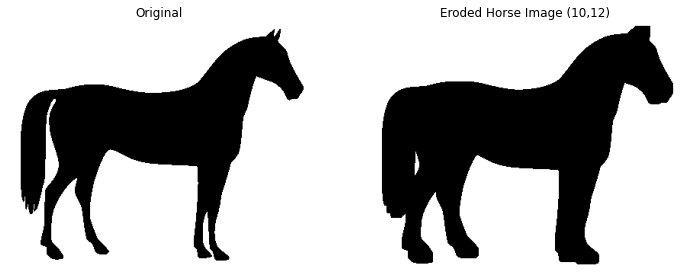

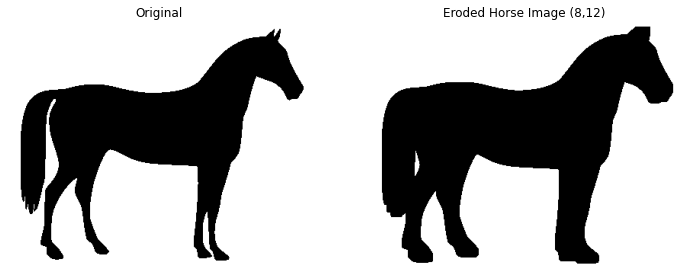

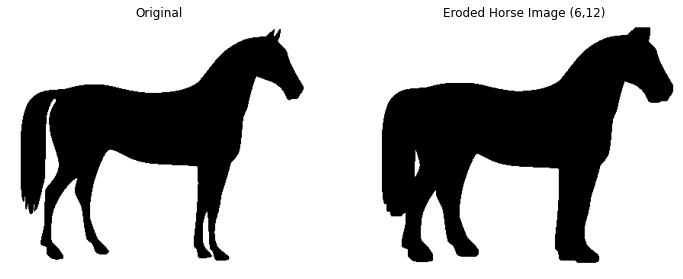

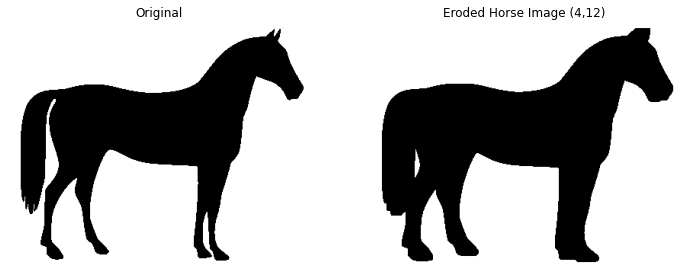

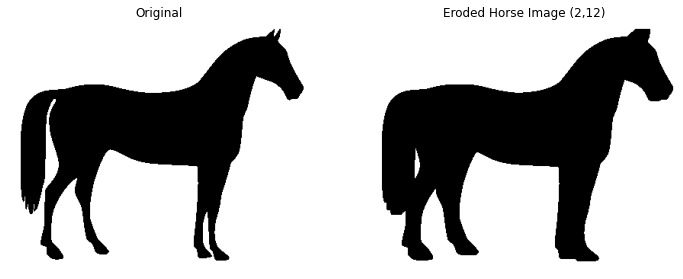

In [36]:
for selem in selem_rows2:
    for selem_ in selem_cols2:
        eroded_horse_image = morphology.binary_erosion(horse_image, selem=morphology.rectangle(selem, selem_))
        plot_comparison(horse_image, 'Original', eroded_horse_image, 'Eroded Horse Image ('+ str(selem)+','+str(selem_)+')')

## Adjusting col_size of structuring element: Inverted horse with erosion

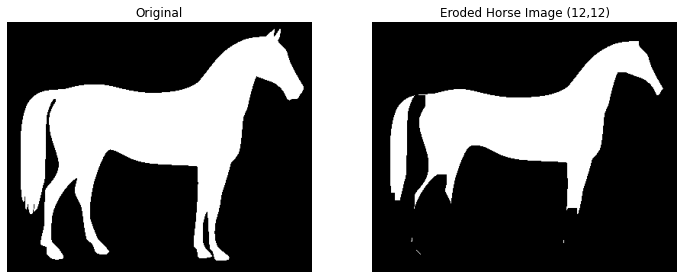

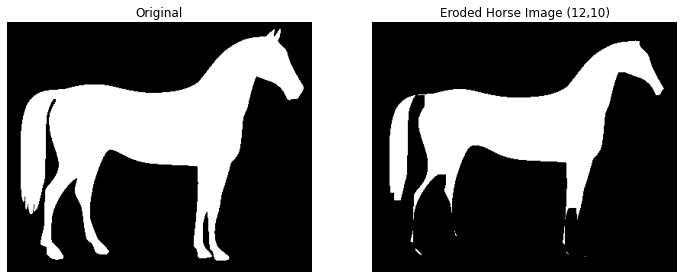

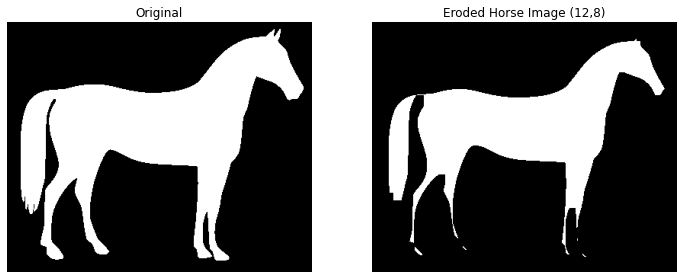

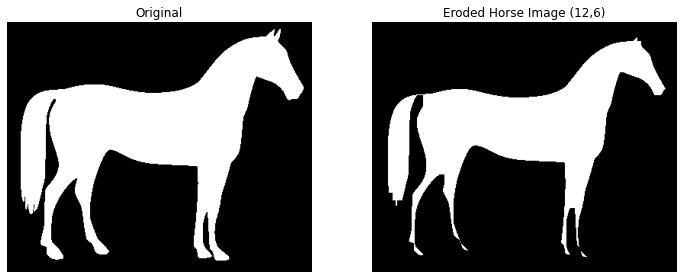

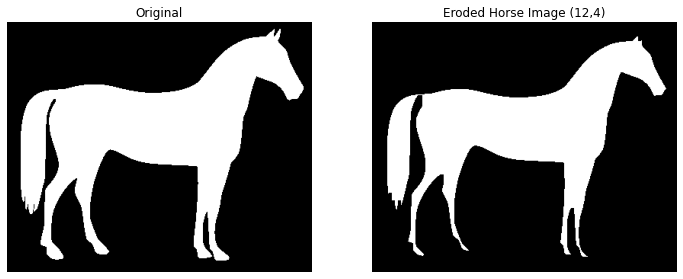

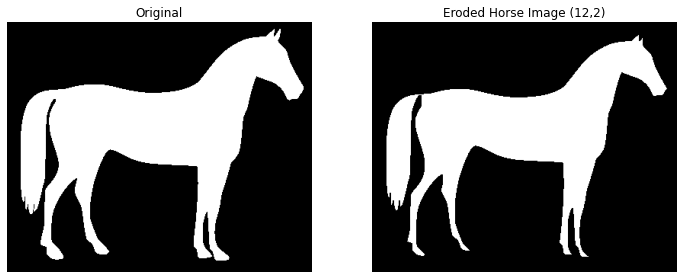

In [37]:
for selem in selem_rows:
    for selem_ in selem_cols:
        eroded_horse_image = morphology.binary_erosion(inverted_horse, selem=morphology.rectangle(selem, selem_))
        plot_comparison(inverted_horse, 'Original', eroded_horse_image, 'Eroded Horse Image ('+ str(selem)+','+str(selem_)+')')

## Adjusting row_size of structuring element: Inverted horse with erosion

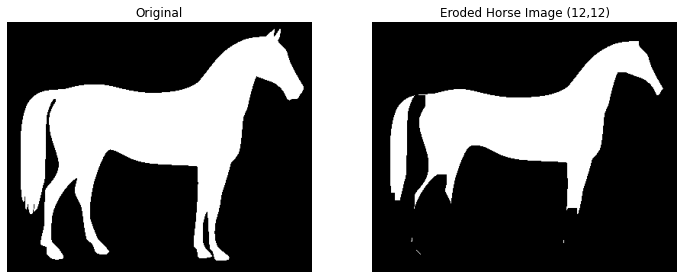

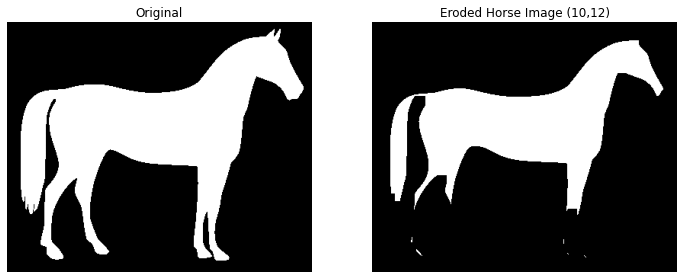

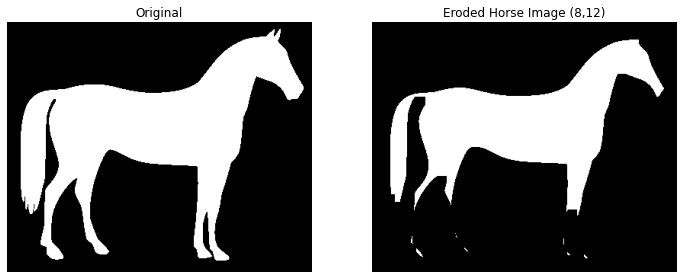

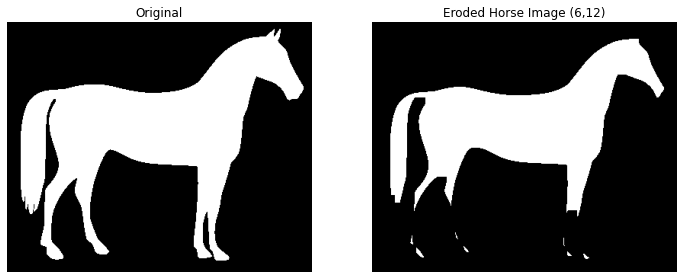

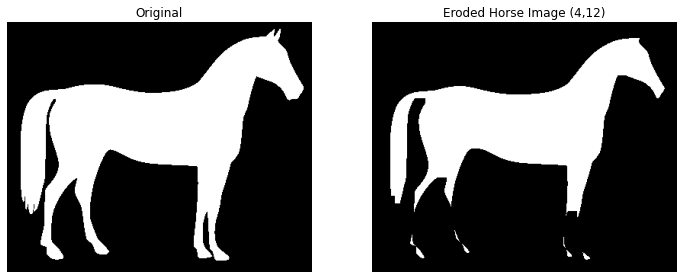

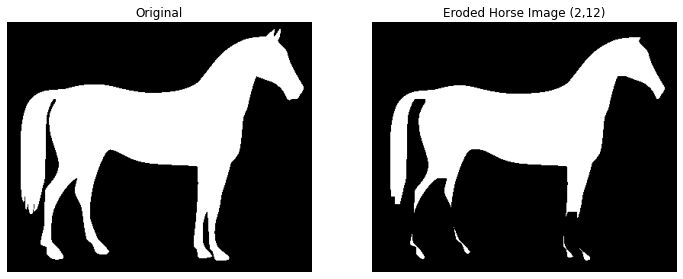

In [38]:
for selem in selem_rows2:
    for selem_ in selem_cols2:
        eroded_horse_image = morphology.binary_erosion(inverted_horse, selem=morphology.rectangle(selem, selem_))
        plot_comparison(inverted_horse, 'Original', eroded_horse_image, 'Eroded Horse Image ('+ str(selem)+','+str(selem_)+')')

* We can see that the resulting images are missing some pixels, but are still more or less showing the horse shape
* If we apply binary erosion with default structuring element shape, we would obtain the eroded images below:

## Default structuring element

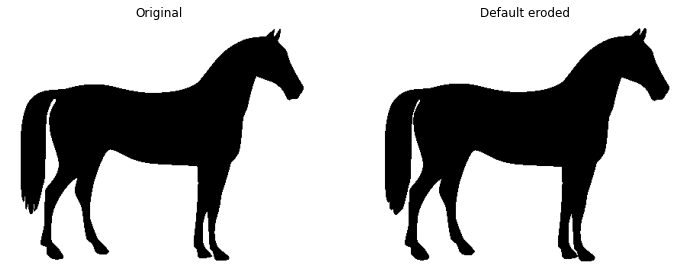

In [39]:
# Binary erosion with default selem
eroded_image = morphology.binary_erosion(horse_image)
plot_comparison(horse_image, "Original", eroded_image, "Default eroded")

## Default structuring element on inverted horse image

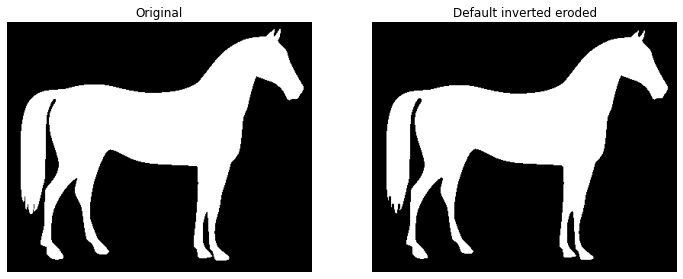

In [42]:
# Binary erosion with default selem
eroded_image = morphology.binary_erosion(inverted_horse)
plot_comparison(inverted_horse, "Original", eroded_image, "Default inverted eroded")

* We see that, here, at least, the default structuring element works better than the manually defined one. So, **for this image, the cross-shaped works best**.

## Dilation
* As the name implies, this operation "expands" the objects in the image.
* Below, we use binary dilation function, also from the morphology module, on `horse_image`
* We'll use the default structuring element which is cross-shaped.

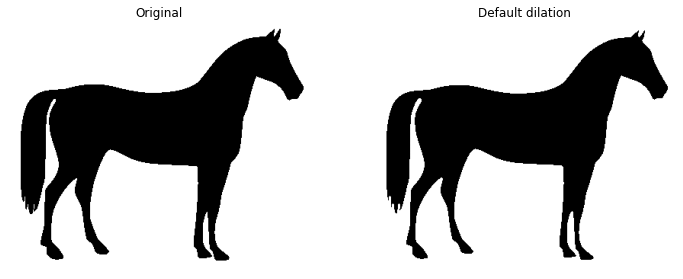

In [44]:
# from skimage import morphology

# Obtain dilated image, using binary dilation
dilated_image = morphology.binary_dilation(horse_image)

# See results
plot_comparison(horse_image, 'Original', dilated_image, 'Default dilation')

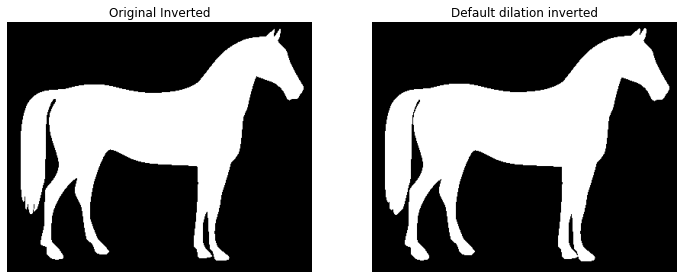

In [46]:
dilated_image_inverted = morphology.binary_dilation(inverted_horse)
plot_comparison(inverted_horse, 'Original Inverted', dilated_image_inverted, 'Default dilation inverted')

* We can see that dilation is indeed adding just a little bit in some parts, like in the lower legs and hooves.
* However, we also see that the default structuring element works well.

### Handwritten letters
A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (**OCR**) to distinguish printed or handwritten text characters inside digital images of physical documents.

Below we will try improving the definition of handwritted letters so that they are easier to classify.

```
# Import the morphology module
from skimage import morphology

# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(upper_r_image) 

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')
```

### Improving thresholded image
In this exercise, we'll try to reduce the noise of a thresholded image using the dilation morphological operation. This operation, in a way, *expands* the objects in the image.

```
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')
```

# $\star$ Chapter 2: Image Restoration, Noise, Segmentation and Contours

So far, you have done some very cool things with your image processing skills! In this chapter, you will apply image restoration to remove objects, logos, text, or damaged areas in pictures! You will also learn how to apply noise, use segmentation to speed up processing, and find elements in images by their contours.

## Image restoration

In this chapter, we'll learn about image restoration, segmentation, noise, and how to find contours in images. In the first subunit, you will learn to show what you thought was lost. 

Have you ever wondered if it's possible to restore a damaged or defected image? This could have happened because your laptop memory got corrupted, or it could also be a picture of your grandparents' that over time has been scratched and now is somewhat deteriorated. 

## Image reconstruction
* Fixing damaged images
* Removing text
* Removing logos
* Removing other small objects, like tattoos that you prefer not to show on a picture

### Inpainting
* Inpainting is the **reconstruction of losst or deteriorated parts of images**.
* The reconstruction is supposed to be performed in a fully automatic way by **exploiting the information presented in non-damaged regions of the image**.
* In scikit-image, we can apply inpainting with the `inpaint_biharmonic` function, from the `restoration` module.
* Damaged pixels $\Rightarrow$ Set as a mask
    * This needs the location of the damaged pixels to be filled, as a mask image on top of the image to work with.
    * A **mask image** is simply an image where some of the pixel intensity values are zero, and other are non-zero.
    
* Having the image with the defect already loaded, we need to set the mask with the location of the damaged pixels in the image
* Remember that **images are matrices of pixels**.
* For this, in this course, we use the `get_mask` function
* Once we have the mask, we can invoke the `inpaint_biharmonic` function to apply it to the image with the defect
    * Optionally, we can set the boolean parameter `multichannel`
    
```
from skimage.restoration import inpaint

# Obtain the mask
mask = get_mask(defect_image)

# Apply inpainting to the damaged image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, 
                                            mask,
                                            multichannel=True)

# Show the resulting image
show_image(restored_image)

# Show the defect and resulting images
show_image(defect_image, 'Image to restore')
show_image(restored_image, 'Image restored')
```
* We can see how the masked pixels get inpainted by the inpainting algorithm based on the biharmonic equation assumption


Imagine you have an old picture of your parents you want to fix. In this image, we intentionally add the missing pixels by setting them to black. In case you want to remove an object you can manually delineate it in the mask. And if you want to automatically detect it, you would need to use a **thresholding algorithm** or **segmentation method** to do so. (This will be covered further later on)

The scikit-image `inpainting` functin requires the mask to be an array of pixels that need to be inpainted:

## Masks

In [48]:
def get_mask(image):
    ''' Creates mask with three defect regions '''
    mask = np.zeros(image.shape[:-1])
    
    mask[101:106, 0:240] = 1
    
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1
    return mask

* **The mask has to be the same shape as one of the image channels.**
* **Unknown pixels have to be represented with 1 and known pixels with 0.**
* We add the missing pixels by copying the image and turning the pixels in a numpy array of zeroes, meaning its empty.
* We only copy the width and height dimensions of the image, excluding the color dimension, in this case RGB-3.
* Then, we set 1s in the specific areas we want to be treated as lost.

In this exercise, we'll restore an image that has missing parts in it, using the `inpaint_biharmonic()` function.

We'll work on an image from the data module, obtained by `data.astronaut()`. Some of the pixels have been replaced with 0s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 0s turns them totally black. The defective image is saved as an array called `defect_image`.

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas. This mask is preloaded as `mask`.

```
# Import the module from restoration
from skimage.restoration import inpaint

# Show the defective image
show_image(defect_image, 'Image to restore')

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)
show_image(restored_image)
```

### Removing logos
As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

## Noise
* In this subunit, we'll learn about **noise** in images, **how to create it**, and **how to remove it**.

How can an image have noise? Images are signals, and real-world signals usually contain departures from the ideal signal, which is the perfect image, as we observe with our eyes in real life. Such departures are referred to as **noise**. More specifically, **noise is the result of errors in the image acquisition process that result in pixel values that do not reflect the true intensities of the real scene**. In the image below, we can see how there is a variation of brightness and color that does not correspond to reality, which is produced by the camera.

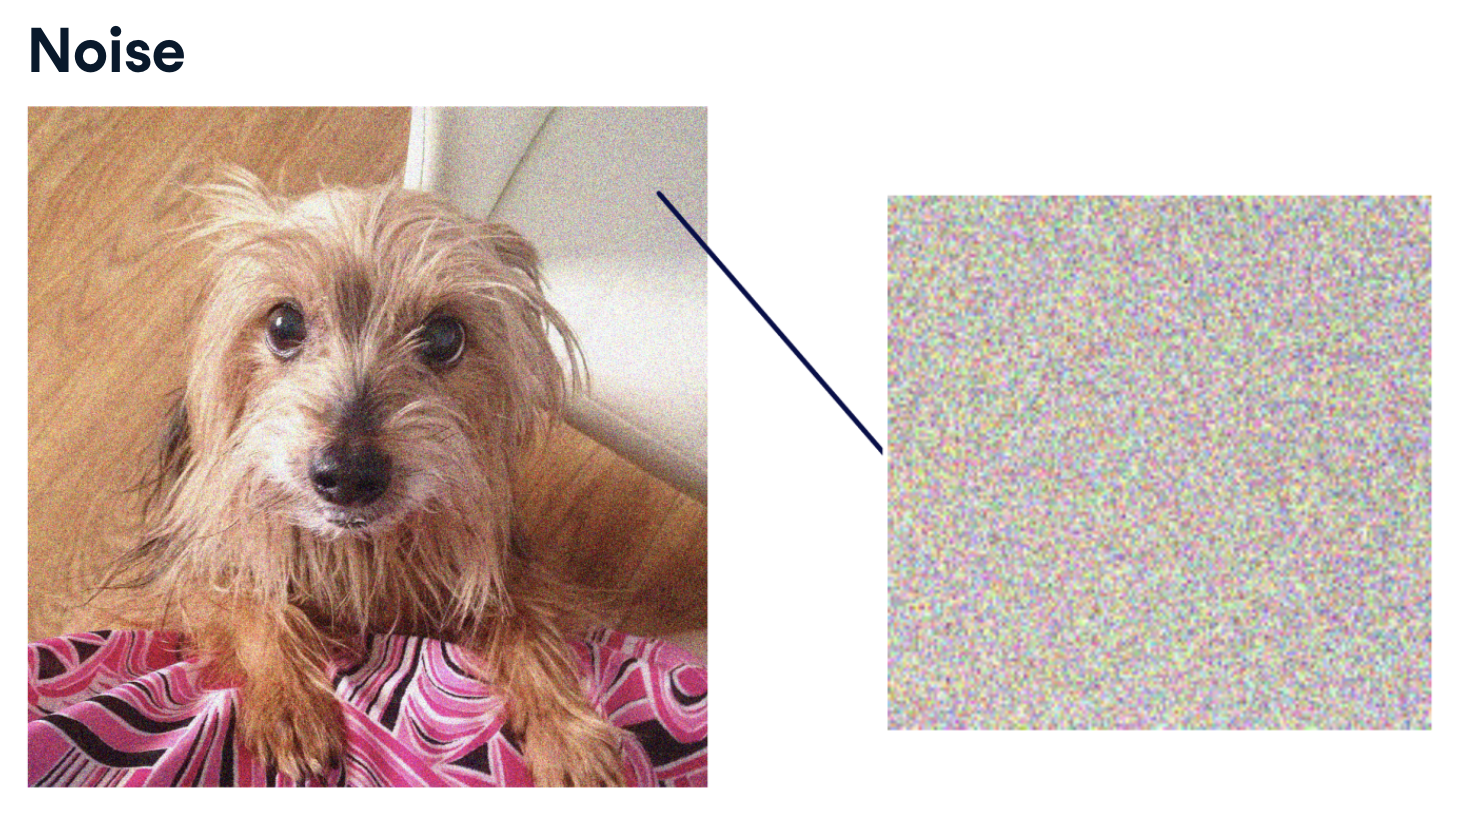

In [52]:
display.Image("pics/noise.png")